# Name: Bhavesh Bhagria
## GRIP TASK 2: Exploratory Data Analysis: Retail

Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
As a business manager, try to find out the weak areas where you can work to make more profit.

## Problem Statement



What all business problems you can derive by exploring the data?

In [1]:
#Import all the necessary libraries\
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the CSV dataset
df=pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
#Check for null values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [4]:
#Print the unique values to understand the contents of the dataset
print(df['Ship Mode'].unique())
print(df['Segment'].unique())
print(df['Country'].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['United States']


In [5]:
#Same step as Above
print(df['Region'].unique())
print(df['Category'].unique())
print(df['Sub-Category'].unique())
print(df['Sales'].unique())
print(df['Quantity'].unique())
print(df['Discount'].unique())
print(df['Profit'].unique())

['South' 'West' 'Central' 'East']
['Furniture' 'Office Supplies' 'Technology']
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
[261.96  731.94   14.62  ... 437.472  97.98  243.16 ]
[ 2  3  5  7  4  6  9  1  8 14 11 13 10 12]
[0.   0.45 0.2  0.8  0.3  0.5  0.7  0.6  0.32 0.1  0.4  0.15]
[ 41.9136 219.582    6.8714 ...  16.124    4.1028  72.948 ]


In [6]:
#Get the number of unique values
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [7]:
#Get the necessary statistical data
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
#Get the information oabout the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


# Data Pre-Processing

In [9]:
#Check for correlation between data
df=df.drop(['Country', 'Postal Code'], axis=1)
print(df.head())
df.corr()

        Ship Mode    Segment             City       State Region  \
0    Second Class   Consumer        Henderson    Kentucky  South   
1    Second Class   Consumer        Henderson    Kentucky  South   
2    Second Class  Corporate      Los Angeles  California   West   
3  Standard Class   Consumer  Fort Lauderdale     Florida  South   
4  Standard Class   Consumer  Fort Lauderdale     Florida  South   

          Category Sub-Category     Sales  Quantity  Discount    Profit  
0        Furniture    Bookcases  261.9600         2      0.00   41.9136  
1        Furniture       Chairs  731.9400         3      0.00  219.5820  
2  Office Supplies       Labels   14.6200         2      0.00    6.8714  
3        Furniture       Tables  957.5775         5      0.45 -383.0310  
4  Office Supplies      Storage   22.3680         2      0.20    2.5164  


,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


In this correlation table, we notice that Sales and Profit both have negative correlateion with Discount. We can assume that because of discount, there are losses

In [10]:
#Check which colums don't have a Object datatype
df.columns[df.dtypes!=object]

Index(['Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


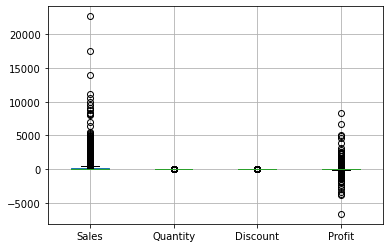

In [11]:
#Plot the numerical data to get a visual representation of the status of profit along with
#other variables.
df.boxplot()
df.head()

The above boxplot shows us that only the profits are in negative.

In [12]:
#Now we well segregate all the regions and look at each of the boxplots to get a sense of which region has the worst losses

#South Region
df_south=pd.DataFrame()
admit_mask=df['Region']=='South'
df_south=df.where(admit_mask)
df_south=df_south.dropna()

#West Region
df_west=pd.DataFrame()
admit_mask_1=df['Region']=='West'
df_west=df.where(admit_mask_1)
df_west=df_west.dropna()

#Central Region
df_central=pd.DataFrame()
admit_mask_2=df['Region']=='Central'
df_central=df.where(admit_mask_2)
df_central=df_central.dropna()

#East Region
df_east=pd.DataFrame()
admit_mask_3=df['Region']=='East'
df_east=df.where(admit_mask_3)
df_east=df_east.dropna()

<AxesSubplot:>

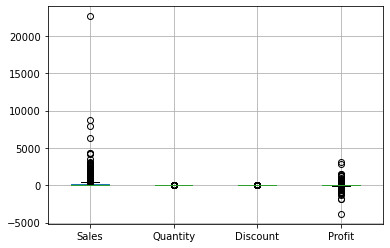

In [13]:
df_south.boxplot()

<AxesSubplot:>

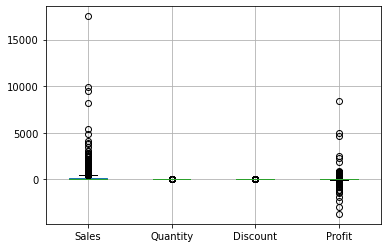

In [14]:
df_central.boxplot()

<AxesSubplot:>

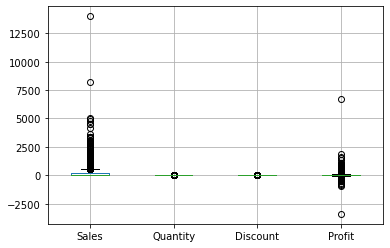

In [15]:
df_west.boxplot()

<AxesSubplot:>

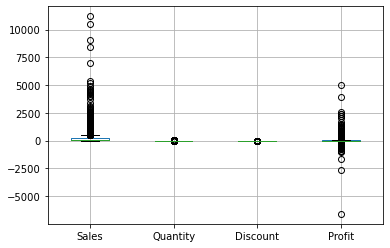

In [16]:
df_east.boxplot()

Through the above boxplots, we get to know that Central and the East regions have the most losses

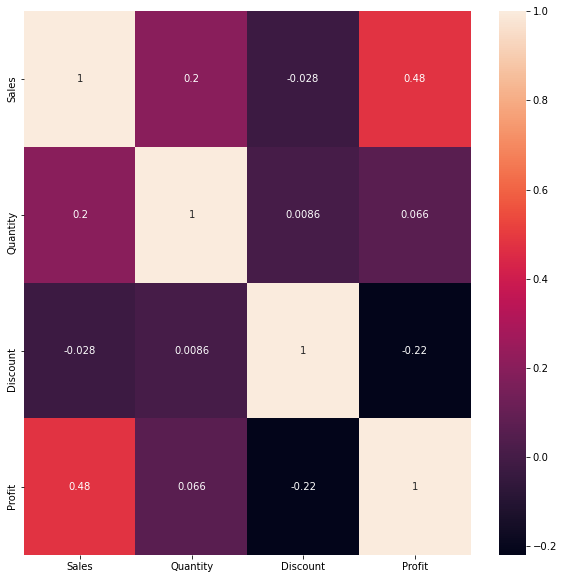

In [17]:
#Plotting a heatmap using seaborn library of the correlation to get a better understanding of the correlation
fig, ax=plt.subplots(figsize=(10,10))
ax=sns.heatmap(df.corr(), annot=True)

In [18]:
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Exploratory Data Analysis

Ship Mode has 9994 total records.
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64


<AxesSubplot:ylabel='Ship Mode'>

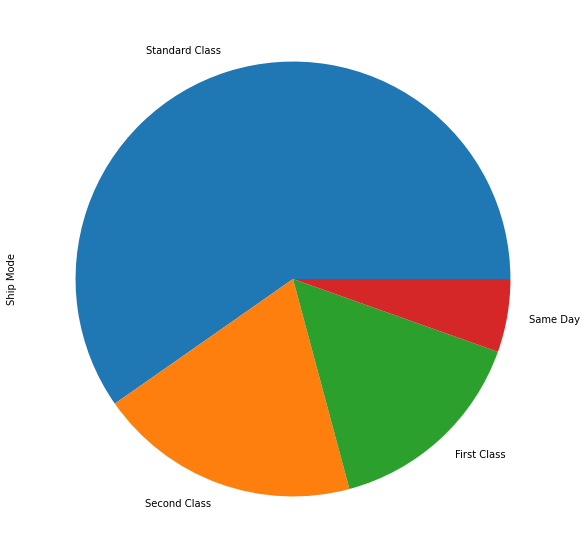

In [67]:
#Getting the data of the shipping modes through which retail stocks arrive
print('Ship Mode has {} total records.'.format(df['Ship Mode'].count()))
print(df['Ship Mode'].value_counts())
VaL=df['Ship Mode'].value_counts()
VaL.plot(kind='pie', figsize=(15,10))

                       Sales       Profit  Discount
Ship Mode                                          
First Class     3.514284e+05   48969.8399   25317.0
Same Day        1.283631e+05   15891.7589    8275.0
Second Class    4.591936e+05   57446.6354   27015.0
Standard Class  1.358216e+06  164088.7875   95502.0


<AxesSubplot:title={'center':'Ship Mode V/S Sales and Profit'}, xlabel='Ship Mode'>

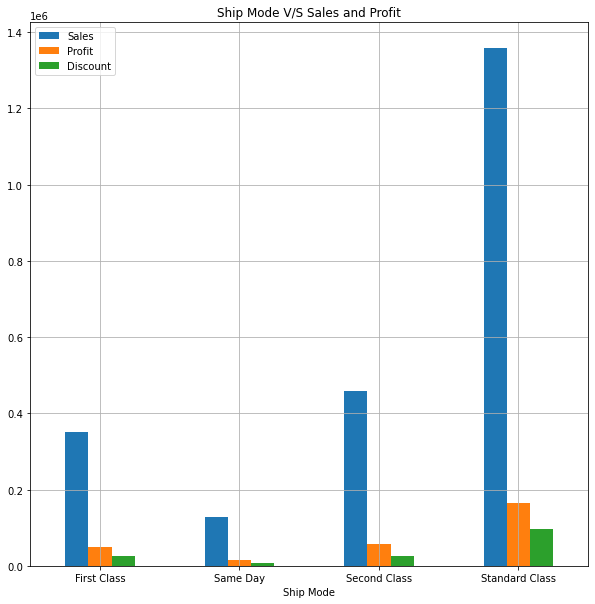

In [62]:
#By using groupby, we combine only the necessary columns together to get clearer visualizations.
#In this case we group Ship mode with Sales and profits column.
ship_mode_groupby=df.groupby('Ship Mode')[['Sales','Profit','Discount']].sum()
ship_mode_groupby['Discount']=ship_mode_groupby['Discount']*100
print(ship_mode_groupby)
ship_mode_groupby.plot(kind='bar', grid=True, figsize=(10,10), title='Ship Mode V/S Sales and Profit', rot=0)

The Standard Class shipping mode has the highest number of sales and profits whereas the Same day shipping Mode has the least number of sales and Profits. None of the shipping modes have any losses.

In [22]:
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


Segment has 9994 total records.
Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64


<AxesSubplot:ylabel='Segment'>

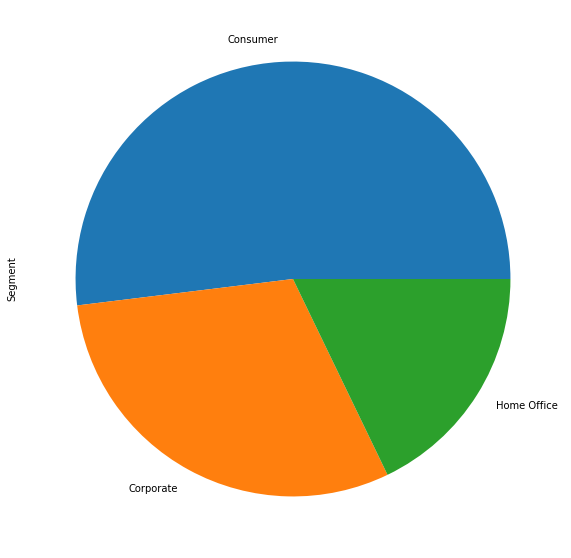

In [66]:
#Getting the data of the Customer Segments that purhase from the retail store
print('Segment has {} total records.'.format(df['Segment'].count()))
print(df['Segment'].value_counts())
VAL=df['Segment'].value_counts()
VAL.plot(kind='pie', figsize=(15,10))

                    Sales       Profit  Discount
Segment                                         
Consumer     1.161401e+06  134119.2092   82091.0
Corporate    7.061464e+05   91979.1340   47785.0
Home Office  4.296531e+05   60298.6785   26233.0


<AxesSubplot:title={'center':'Segment VS.Sales, Profit and Quantity'}, xlabel='Segment'>

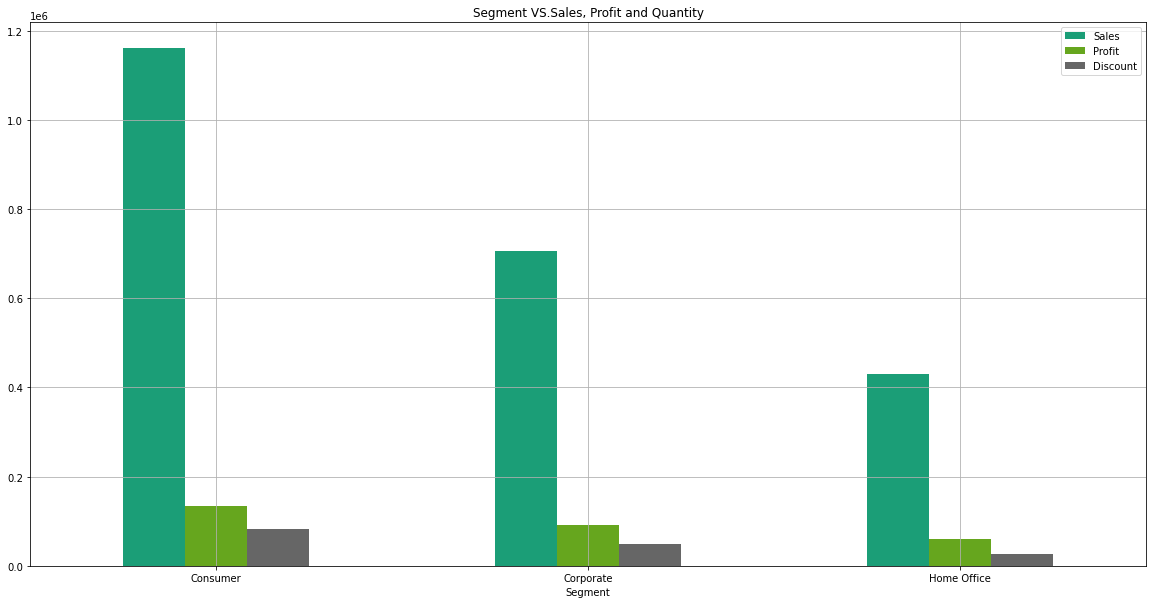

In [61]:
#By using groupby, we combine only the necessary columns together to get clearer visualizations.
#In this case we group Customer Segments with Sales and profits column.
segment_groupby=df.groupby('Segment')[['Sales','Profit','Discount']].sum()
segment_groupby['Discount']=segment_groupby['Discount']*100
print(segment_groupby)
segment_groupby.plot(kind='bar', grid=True,figsize=(20,10), title='Segment VS.Sales, Profit and Quantity', fontsize=10, colormap='Dark2', rot=0)

In this, we can observe that maximum products from the retail store are purchased by the Consumer segment, and the least by the Home office segment. The profits reported by the consumer segment are slightly higher than the Corporate and Home office segment

In [25]:
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


State has 9994 total records
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina

<AxesSubplot:ylabel='State'>

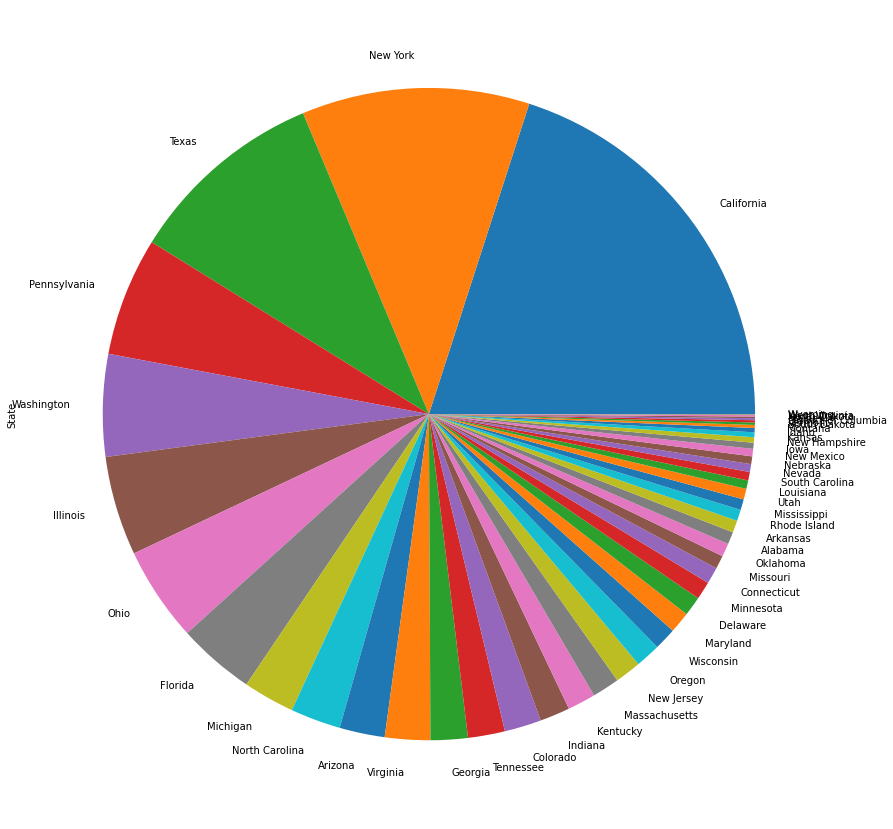

In [26]:
#Getting the data of the States that have a branch of the retail store
print('State has {} total records'.format(df['State'].count()))
print(df['State'].value_counts())
val=df['State'].value_counts()

#Plotting Pie Chart to get a visualizations of the share of each state
val.plot(kind='pie', figsize=(20,15))

                            Sales      Profit  Discount
State                                                  
California            457687.6315  76381.3871   14560.0
New York              310876.2710  74038.5486    6240.0
Washington            138641.2700  33402.6517    3240.0
Michigan               76269.6140  24463.1876     180.0
Virginia               70636.7200  18597.9504       0.0
Indiana                53555.3600  18382.9363       0.0
Georgia                49095.8400  16250.0433       0.0
Kentucky               36591.7500  11199.6966       0.0
Minnesota              29863.1500  10823.1874       0.0
Delaware               27451.0690   9977.3748      60.0
New Jersey             35764.3120   9772.9138      60.0
Wisconsin              32114.6100   8401.8004       0.0
Rhode Island           22627.9560   7285.6293     120.0
Maryland               23705.5230   7031.1788      60.0
Massachusetts          28634.4340   6785.5016     210.0
Missouri               22205.1500   6436.2105   

<AxesSubplot:title={'center':'States v/s Sales and Profit'}, xlabel='State', ylabel='Sales'>

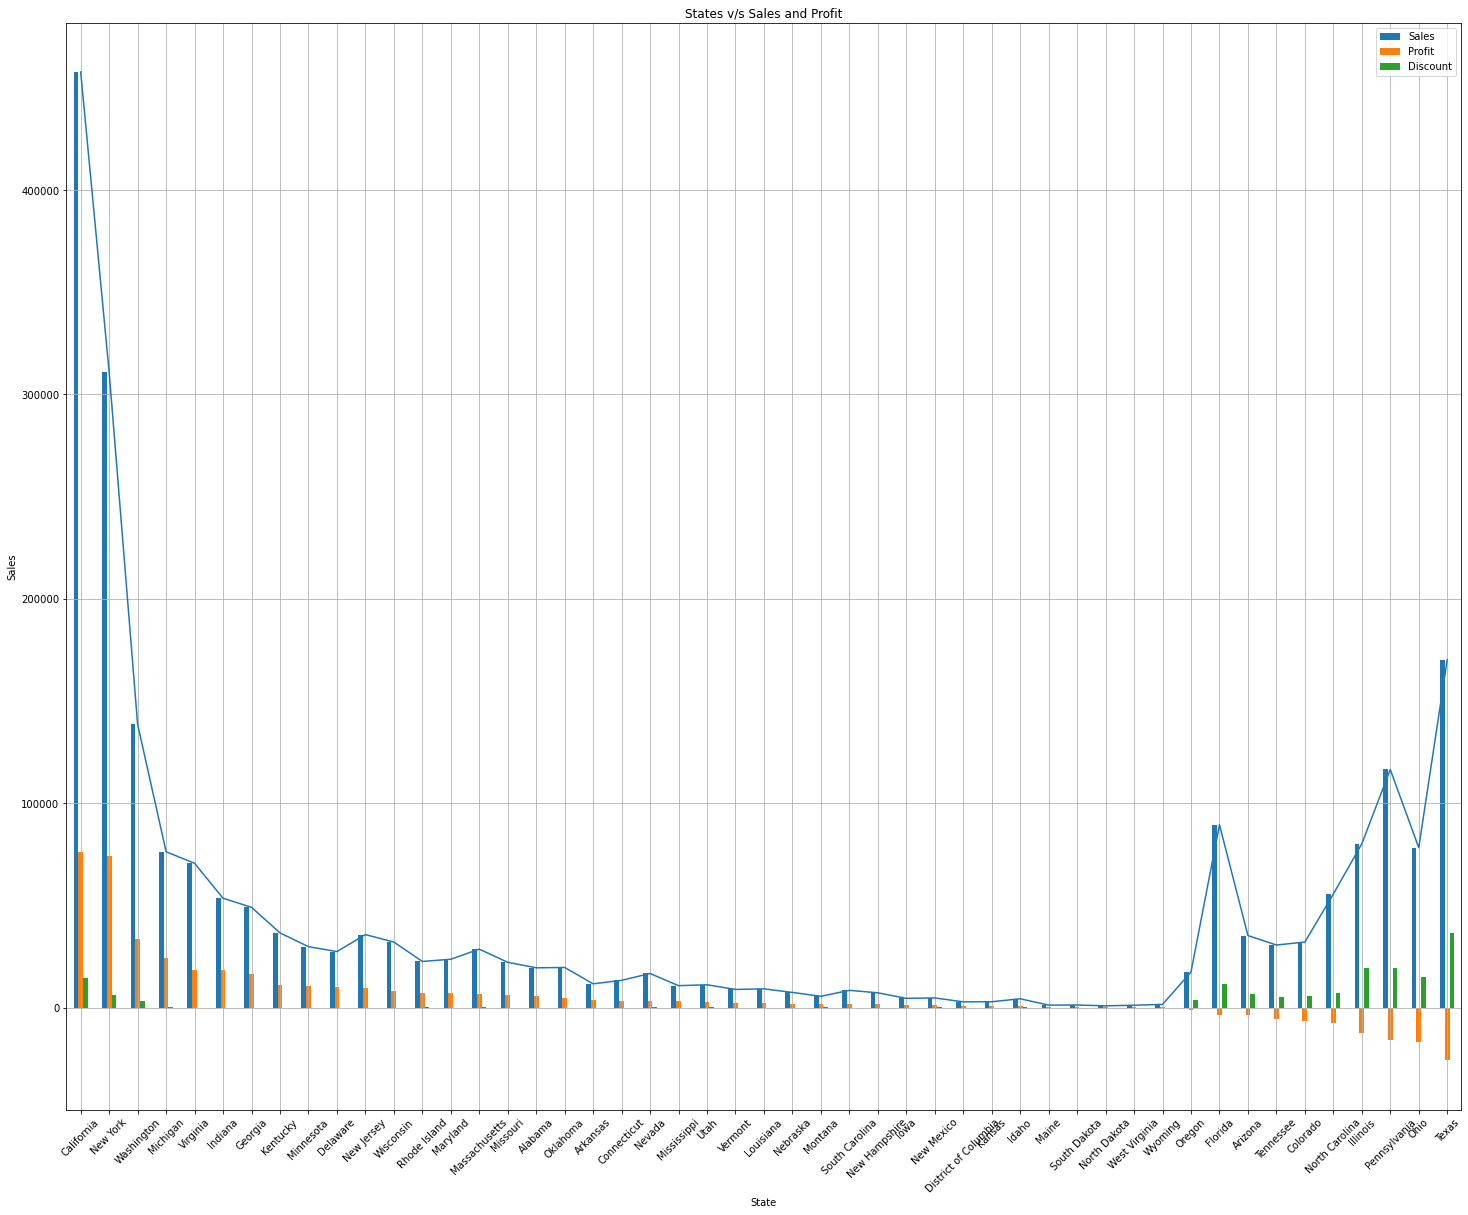

In [56]:
#By using groupby, we combine only the necessary columns together to get clearer visualizations.
#In this case we group American States with Sales and profits column.
state_groupby_prof=df.groupby('State')[['Sales', 'Profit','Discount']].sum()
state_groupby_prof=state_groupby_prof.sort_values(by=['Profit'], ascending=False)
state_groupby_prof['Discount']=state_groupby_prof['Discount']*100
print(state_groupby_prof)
state_groupby_prof.plot(kind='bar', grid=True, figsize=(25,20), title='States v/s Sales and Profit',rot=45)
sns.lineplot(data=state_groupby_prof['Sales'])

The 1st three states, California, New York and Washington have the highest recorded Profits. California and New York have the highest recorded Sales, however, Sales of Washington are less than those of Texas, which has the highest recorded Losses.

In this graph, we can there is a gradual increase in Losses in the last 10 states, even though they have some of the highest recorded sales in the dataset. But these states have significant discount rates.

From this observation we can conclude that Discount has a great impact on the profits of the retail store. Although states such as California and New York have also offered Discounts to their customers, majority of the data suggests that Discounts have a negative impact on the Profits of the Retail Store

                          Profit  Quantity
State                                     
California            76381.3871      7667
New York              74038.5486      4224
Washington            33402.6517      1883
Michigan              24463.1876       946
Virginia              18597.9504       893
Indiana               18382.9363       578
Georgia               16250.0433       705
Kentucky              11199.6966       523
Minnesota             10823.1874       331
Delaware               9977.3748       367
New Jersey             9772.9138       454
Wisconsin              8401.8004       463
Rhode Island           7285.6293       199
Maryland               7031.1788       420
Massachusetts          6785.5016       491
Missouri               6436.2105       252
Alabama                5786.8253       256
Oklahoma               4853.9560       247
Arkansas               4008.6871       240
Connecticut            3511.4918       281
Nevada                 3316.7659       168
Mississippi

<AxesSubplot:title={'center':'States v/s Sales and Quantity'}, xlabel='State', ylabel='Profit'>

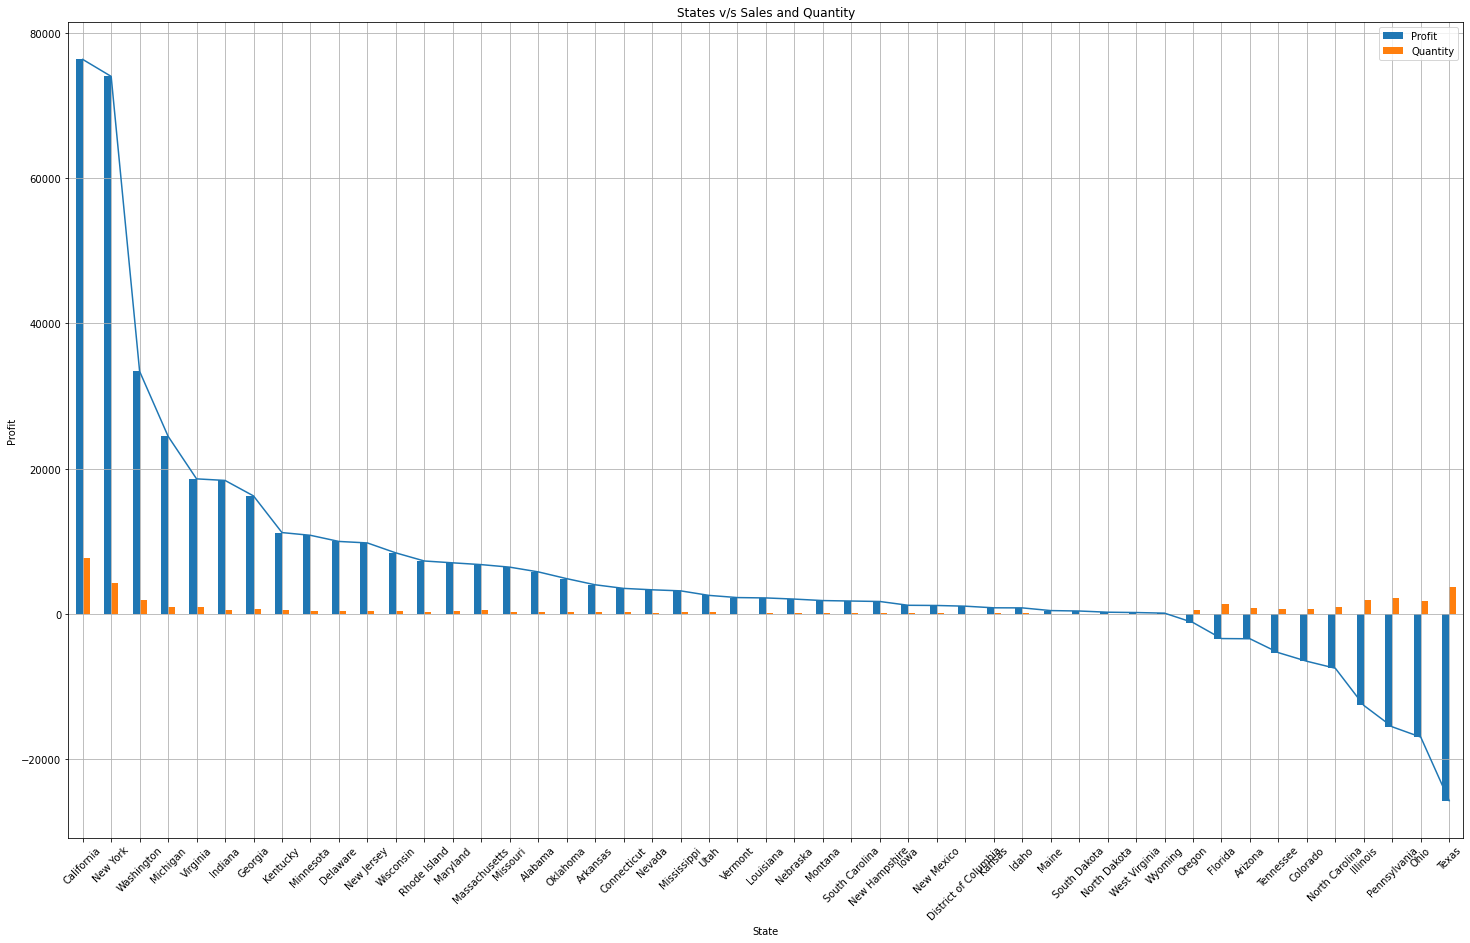

In [54]:
#By using groupby, we combine only the necessary columns together to get clearer visualizations.
#In this case we group the American States with Profits and Quantity column.

state_groupby_quant=df.groupby('State')[['Profit', 'Quantity']].sum()
state_groupby_quant=state_groupby_quant.sort_values(by=['Profit'], ascending=False)
print(state_groupby_quant)
state_groupby_quant.plot(kind='bar', grid=True, figsize=(25,15), title='States v/s Sales and Quantity', fontsize=10, rot=45)
sns.lineplot(data=state_groupby_quant['Profit'])

Sub_Category has 9994 total records.
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


<AxesSubplot:ylabel='Sub-Category'>

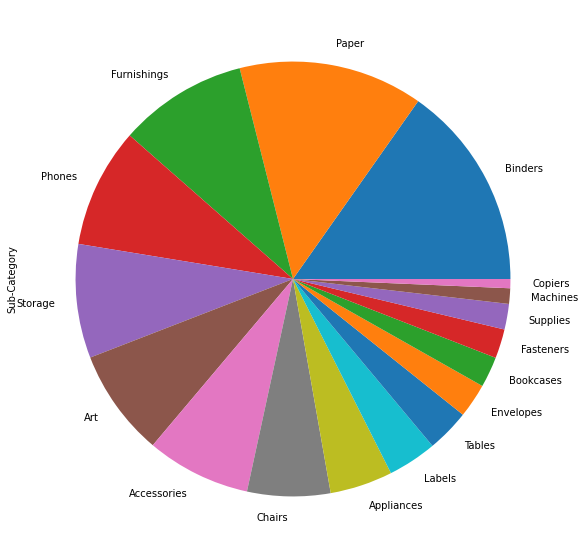

In [53]:
#Getting the data of the number sales of each Sub Category  that have a branch of the retail store
print('Sub_Category has {} total records.'.format(df['Sub-Category'].count()))
print(df['Sub-Category'].value_counts())
val_sub=df['Sub-Category'].value_counts()

#Plotting Pie Chart to get a visualizations of the share of each Sub Category
val_sub.plot(kind='pie', figsize=(20,10))

                    Sales      Profit  Discount
Sub-Category                                   
Copiers       149528.0300  55617.8249    1100.0
Phones        330007.0540  44515.7306   13740.0
Accessories   167380.3180  41936.6357    6080.0
Paper          78479.2060  34053.5693   10260.0
Binders       203412.7330  30221.7633   56700.0
Chairs        328449.1030  26590.1663   10500.0
Storage       223843.6080  21278.8264    6320.0
Appliances    107532.1610  18138.0054    7760.0
Furnishings    91705.1640  13059.1436   13240.0
Envelopes      16476.4020   6964.1767    2040.0
Art            27118.7920   6527.7870    5960.0
Labels         12486.3120   5546.2540    2500.0
Machines      189238.6310   3384.7569    3520.0
Fasteners       3024.2800    949.5182    1780.0
Supplies       46673.5380  -1189.0995    1460.0
Bookcases     114879.9963  -3472.5560    4814.0
Tables        206965.5320 -17725.4811    8335.0


<AxesSubplot:title={'center':'Sub-Category v/s Sales and Profit'}, xlabel='Sub-Category', ylabel='Profit'>

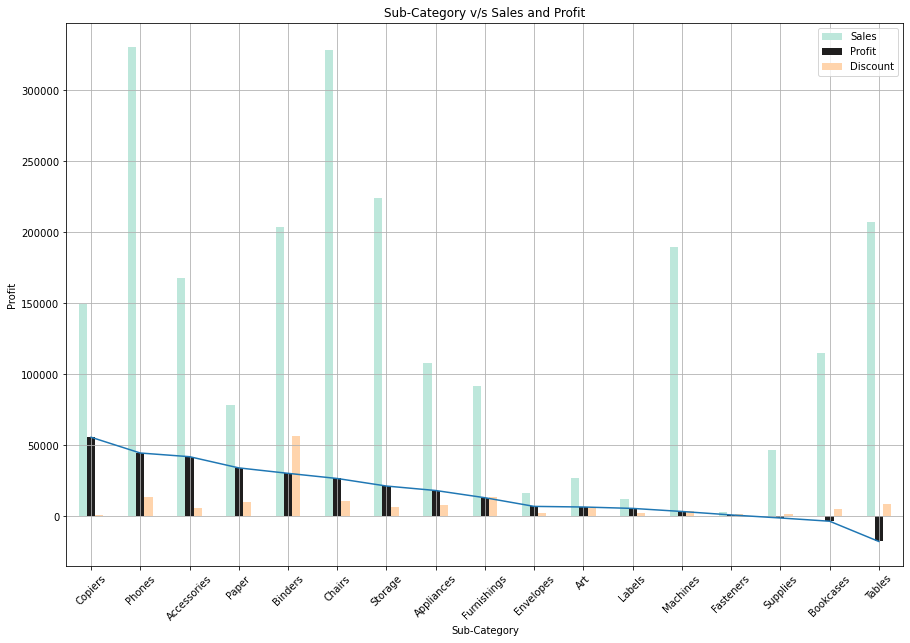

In [63]:
#By using groupby, we combine only the necessary columns together to get clearer visualizations.
#In this case we group Sub Categories with Sales and Profits column.
sub_cat_group=df.groupby('Sub-Category')[['Sales','Profit', 'Discount']].sum()
sub_cat_group=sub_cat_group.sort_values(by=['Profit'], ascending=False)
sub_cat_group['Discount']=sub_cat_group['Discount']*100
print(sub_cat_group)
sub_cat_group.plot(kind='bar', grid=True, figsize=(15,10), title='Sub-Category v/s Sales and Profit', colormap='icefire', rot=45)
sns.lineplot(data=sub_cat_group['Profit'])

This is a representation of the Sub-Category of the products sold at the retail store. The sub-category with the highest profit, Copiers, suprisingly does not record the highest sales among the others. Phones have the second highest profits recorded with the highest sales and a decent discount. 

Tables, bookcases and supplies have recorded losses. It is difficult to say that Discounts are the reason for losses here, as there can be a number of other factors, such as the popularity of the product and the frequency with which it is purchased. But discount does have an impact on the profits.

               Sales       Profit  Discount
Region                                     
Central  501239.8908   39706.3625   55834.0
East     678781.2400   91522.7800   41400.0
South    391721.9050   46749.4303   23855.0
West     725457.8245  108418.4489   35020.0


<AxesSubplot:xlabel='Region', ylabel='Sales'>

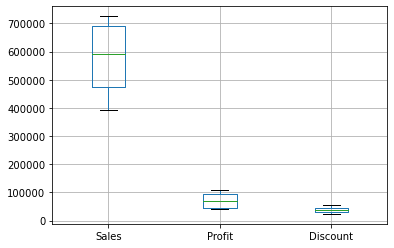

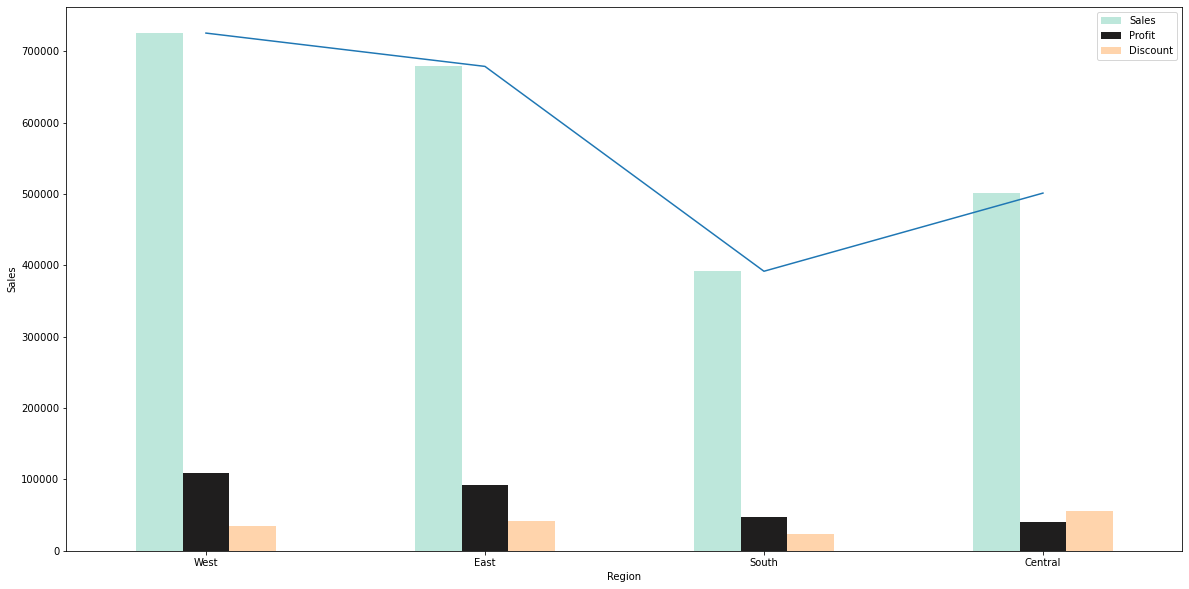

In [64]:
#By using groupby, we combine only the necessary columns together to get clearer visualizations.
#In this case we group Region with Sales and Profits column.
df_region_groupby=df.groupby('Region')[['Sales','Profit','Discount']].sum()
df_region_groupby['Discount']=df_region_groupby['Discount']*100
df_region_groupby.boxplot()
print(df_region_groupby)
df_region_groupby=df_region_groupby.sort_values(by=['Profit'], ascending=False)
df_region_groupby.plot(kind='bar',figsize=(20,10), rot=0,colormap='icefire')
sns.lineplot(data=df_region_groupby['Sales'])

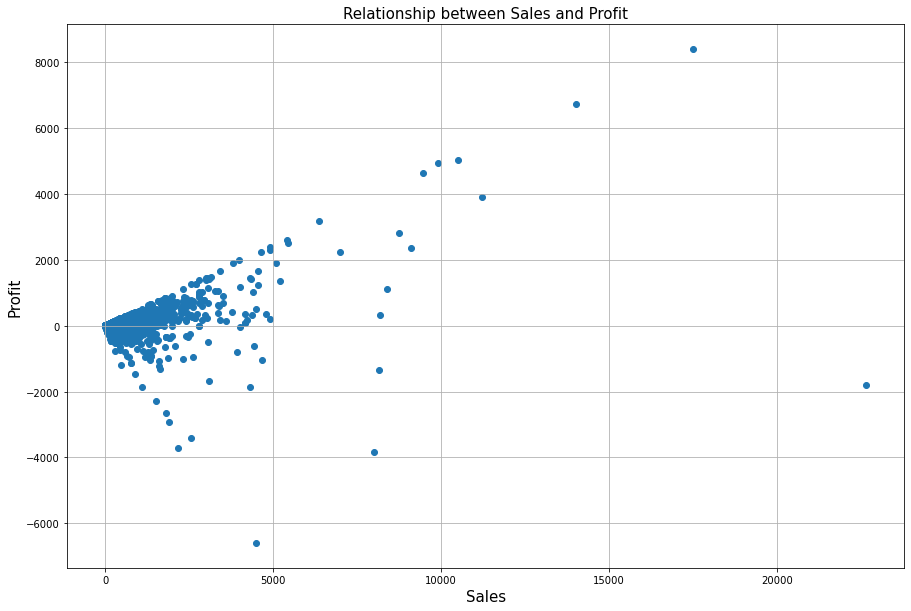

In [79]:
fig, ax=plt.subplots(figsize=(15,10))
ax.scatter(x=df['Sales'], y=df['Profit'])
ax.set_xlabel('Sales', fontsize=15)
ax.set_ylabel('Profit', fontsize=15)
plt.title('Relationship between Sales and Profit', fontsize=15)
plt.grid()
plt.show()

## Relationship between Sales and Profit

1) Majority of the sales are below 5000

2) Mostly profitable sales are above 5000

3) Sales below 5000 are in majority, but they have also resulted in majority of the losses

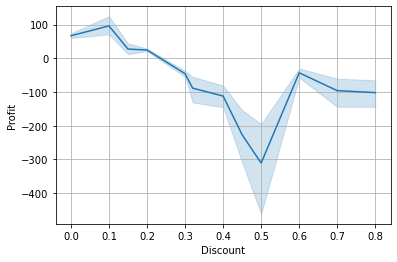

In [93]:
sns.lineplot(x='Discount', y='Profit', data=df)
plt.grid()
plt.show()

# Improvement areas for Business
## Based on the above analysis, here are some recommendations for the business



1) Ship Mode:
    Same day shipping mode and Second Class shipping have significant losses compared to there sales figure
    
2) Segment:
    Home office segment needs improvement in sales and profits figures. My recommendation is an in-depth research into why 
    that segment has such low figures. Factors such as customer satisfaction and the frequency with the products are 
    purchased can be useful
    
3) States:
    Texas, Illinois, and Florida have recorded major sales with significant losses in this sector. One heavy factor in this
    is Discount. Discounts have heavily harmed the figures. An in-depth research into why discount didn't succeed in this
    sector is advisable

4) Sub-Category:
    Tables, bookcases and supplies have recorded losses. It is difficult to say that Discounts are the reason for losses
    here, as there can be a number of other factors, such as the popularity of the product and the frequency with which it
    is purchased. But discount does have an impact on the profits.
    
5) Region:
    Central and South regions need improvement.